In [24]:
import numpy as np
import cv2
import torch
from PIL import Image
import matplotlib.pyplot as plt
import easyocr

%matplotlib inline

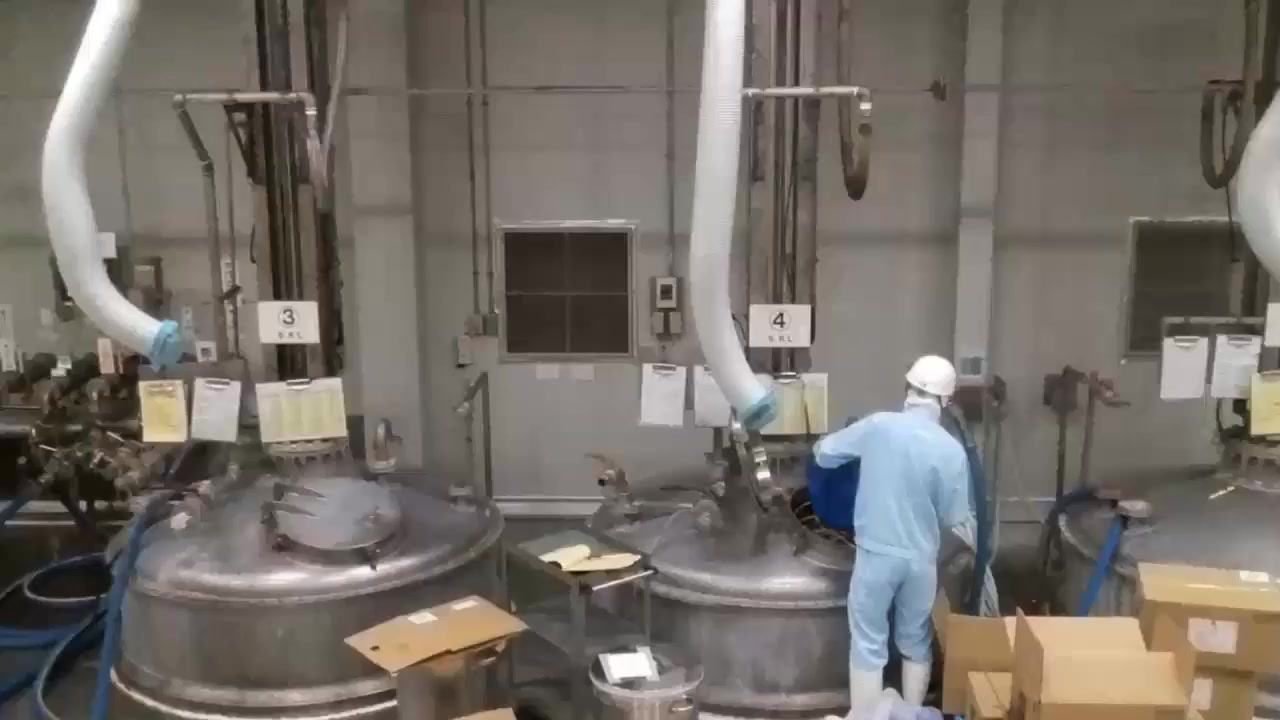

In [3]:
image = '../data/frame.jpg'

img = Image.open(image)
display(img)

In [8]:
# yolo

yolo_model = torch.hub.load("ultralytics/yolov5", "yolov5x6")

Using cache found in /Users/bianrogerkejia/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-6-11 Python-3.8.6 torch-1.9.1 CPU

100.0%

Fusing layers... 
YOLOv5x6 summary: 574 layers, 140730220 parameters, 0 gradients, 209.6 GFLOPs
Adding AutoShape... 


In [10]:
detection = yolo_model(img)
coords = detection.xyxy[0]
coords

tensor([[8.06579e+02, 3.51788e+02, 9.77370e+02, 7.14150e+02, 9.24225e-01, 0.00000e+00]])

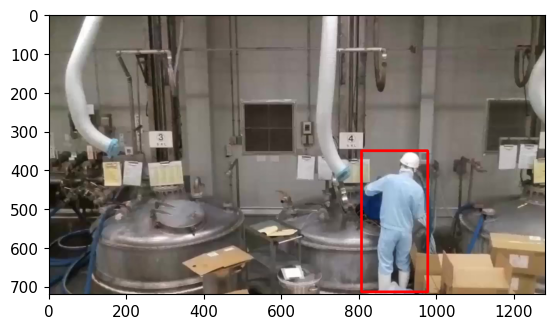

In [53]:
np_img = np.array(img)

for j in coords:
    if j[-1] == 0 and j[-2] > 0.5:
        l = int(j[0])
        r = int(j[2])
        t = int(j[1])
        b = int(j[3])
        
        cv2.rectangle(np_img, (l, t), (r, b), (255, 0, 0), 5)

plt.imshow(np_img)

In [38]:
# easyocr

reader = easyocr.Reader(['en'], gpu=False)

Using CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

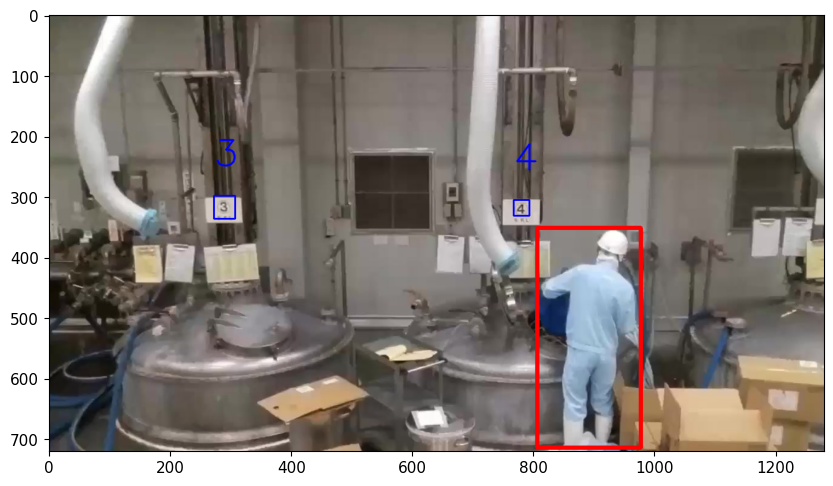

In [54]:
d = reader.readtext(np_img, min_size=5, text_threshold=0.3, mag_ratio=2, allowlist='0123456789')


for i in d:
    if i[-1] > 0.1:
        l = i[0][0][0] - 10
        r = i[0][2][0] + 10
        t = i[0][0][1] - 10
        b = i[0][2][1] + 10
        
        cv2.rectangle(np_img, (l, t), (r, b), (0, 0, 255), 2)
        cv2.putText(np_img, i[1], (l, t - 50), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 2, cv2.LINE_AA)

plt.figure(figsize=(10,10))
plt.imshow(np_img)